In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import pickle

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the cleaned dataset
data_path = '../data/cleaned_label.csv'

print("Loading dataset...")
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Display first few rows
print("\nFirst few rows:")
print(df.head())

# Check data distribution
print("\n" + "="*60)
print("Data Distribution:")
print("="*60)
if 'sentiment_label' in df.columns:
    print(f"Positive reviews: {np.sum(df['sentiment_label'] == 1)} ({np.sum(df['sentiment_label'] == 1) / len(df) * 100:.2f}%)")
    print(f"Negative reviews: {np.sum(df['sentiment_label'] == 0)} ({np.sum(df['sentiment_label'] == 0) / len(df) * 100:.2f}%)")
else:
    print("Available columns:", df.columns.tolist())

Loading dataset...
Dataset loaded successfully!
Shape: (50000, 2)
Columns: ['review_text', 'sentiment_label']

First few rows:
                                         review_text  sentiment_label
0  Once again Mr. Costner has dragged out a movie...                0
1  This is a pale imitation of 'Officer and a Gen...                0
2  Years ago, when DARLING LILI played on TV, it ...                0
3  I was looking forward to this movie. Trustwort...                0
4  First of all, I would like to say that I am a ...                0

Data Distribution:
Positive reviews: 25000 (50.00%)
Negative reviews: 25000 (50.00%)
Dataset loaded successfully!
Shape: (50000, 2)
Columns: ['review_text', 'sentiment_label']

First few rows:
                                         review_text  sentiment_label
0  Once again Mr. Costner has dragged out a movie...                0
1  This is a pale imitation of 'Officer and a Gen...                0
2  Years ago, when DARLING LILI played on TV, it 

In [3]:
# Initialize TF-IDF Vectorizer
print("Creating TF-IDF features...")
print("="*60)

tfidf = TfidfVectorizer(
    max_features=5000,        # Keep top 5000 features
    min_df=2,                 # Minimum document frequency
    max_df=0.8,               # Maximum document frequency (ignore too common words)
    ngram_range=(1, 2),       # Use unigrams and bigrams
    stop_words='english',     # Remove English stop words
    sublinear_tf=True         # Use sublinear tf scaling
)

# Fit and transform the text data
X = tfidf.fit_transform(df['review_text'])
y = df['sentiment_label'].values

print(f"TF-IDF features created successfully!")
print(f"Feature matrix shape: {X.shape}")
print(f"  - Number of samples: {X.shape[0]}")
print(f"  - Number of features: {X.shape[1]}")
print(f"  - Matrix sparsity: {(1 - X.nnz / (X.shape[0] * X.shape[1])) * 100:.2f}%")

# Show top features
feature_names = tfidf.get_feature_names_out()
print(f"\nTop 20 features (by vocabulary):")
print(feature_names[:20])

Creating TF-IDF features...
TF-IDF features created successfully!
Feature matrix shape: (50000, 5000)
  - Number of samples: 50000
  - Number of features: 5000
  - Matrix sparsity: 98.55%

Top 20 features (by vocabulary):
['00' '000' '10' '10 10' '10 minutes' '10 stars' '10 years' '100' '11'
 '12' '13' '13th' '14' '15' '15 minutes' '16' '17' '18' '1930' '1930s']
TF-IDF features created successfully!
Feature matrix shape: (50000, 5000)
  - Number of samples: 50000
  - Number of features: 5000
  - Matrix sparsity: 98.55%

Top 20 features (by vocabulary):
['00' '000' '10' '10 10' '10 minutes' '10 stars' '10 years' '100' '11'
 '12' '13' '13th' '14' '15' '15 minutes' '16' '17' '18' '1930' '1930s']


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Data split completed!")
print("="*60)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print("\nTraining set distribution:")
print(f"  Positive: {np.sum(y_train == 1)} ({np.sum(y_train == 1) / len(y_train) * 100:.2f}%)")
print(f"  Negative: {np.sum(y_train == 0)} ({np.sum(y_train == 0) / len(y_train) * 100:.2f}%)")
print("\nTesting set distribution:")
print(f"  Positive: {np.sum(y_test == 1)} ({np.sum(y_test == 1) / len(y_test) * 100:.2f}%)")
print(f"  Negative: {np.sum(y_test == 0)} ({np.sum(y_test == 0) / len(y_test) * 100:.2f}%)")

Data split completed!
Training set: 40000 samples
Testing set: 10000 samples
Features: 5000

Training set distribution:
  Positive: 20000 (50.00%)
  Negative: 20000 (50.00%)

Testing set distribution:
  Positive: 5000 (50.00%)
  Negative: 5000 (50.00%)


In [5]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0, random_state=42),
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

results = {}

print("Training models with TF-IDF features...")
print("="*80)

for name, model in models.items():
    print(f"\n{name}")
    print("-"*80)
    
    # Train
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'train_time': train_time,
        'predictions': y_pred
    }

print("\n" + "="*80)
print("All models trained successfully!")

Training models with TF-IDF features...

Logistic Regression
--------------------------------------------------------------------------------
Training time: 0.09 seconds
Accuracy: 0.8952

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89      5000
    Positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Naive Bayes
--------------------------------------------------------------------------------
Training time: 0.01 seconds
Accuracy: 0.8555

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      5000
    Positive       0.85      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86    

In [6]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Training Time (s)': [results[name]['train_time'] for name in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\nModel Comparison (TF-IDF Features):")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


Model Comparison (TF-IDF Features):
              Model  Accuracy  Training Time (s)
Logistic Regression    0.8952           0.094285
                SVM    0.8904         533.242272
        Naive Bayes    0.8555           0.008089
      Random Forest    0.8483           7.093916

🏆 Best Model: Logistic Regression
   Accuracy: 0.8952 (89.52%)


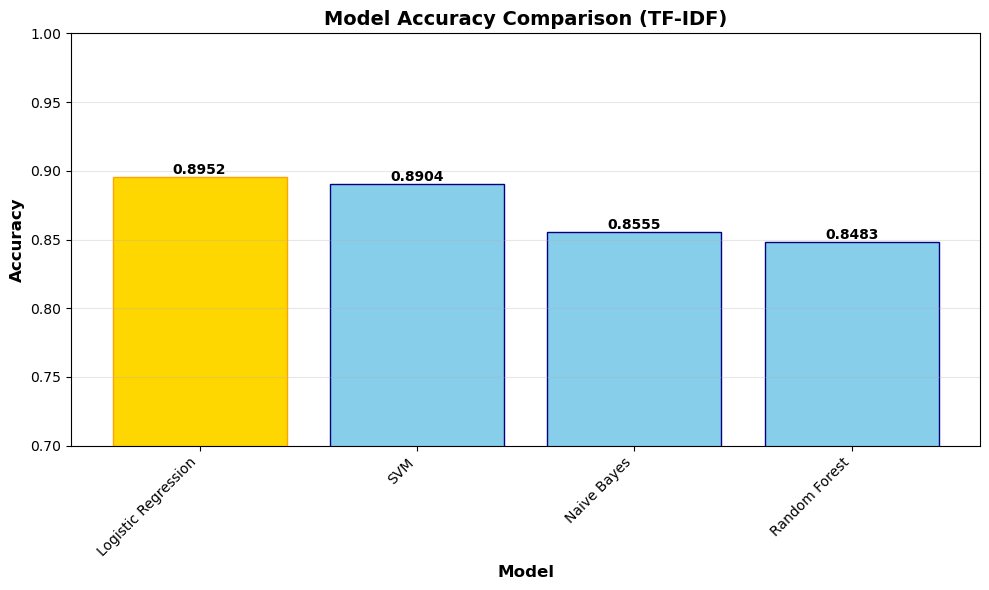

Accuracy comparison chart created!


In [7]:
# Plot 1: Accuracy comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

bars = ax.bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue', edgecolor='navy')

# Color the best model differently
bars[0].set_color('gold')
bars[0].set_edgecolor('orange')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Accuracy Comparison (TF-IDF)', fontsize=14, fontweight='bold')
ax.set_ylim([0.7, 1.0])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Accuracy comparison chart created!")

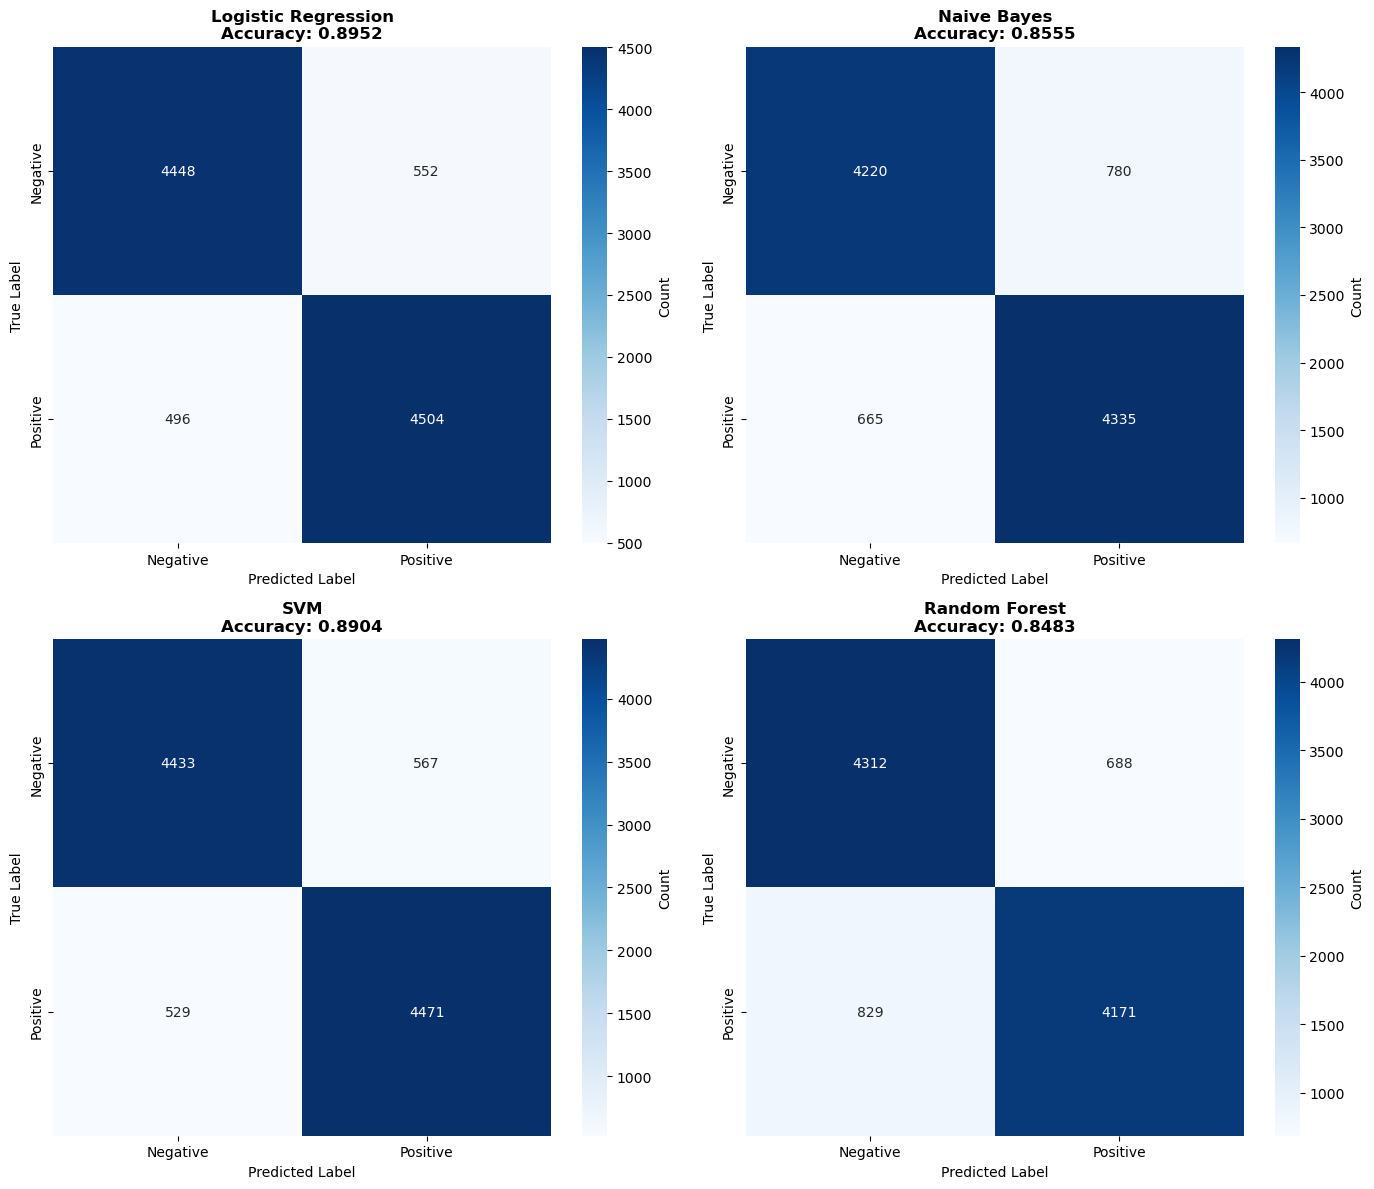

Confusion matrices generated successfully!


In [8]:
# Plot 2: Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                cbar_kws={'label': 'Count'})
    
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.show()

print("Confusion matrices generated successfully!")

In [9]:
# Get feature importance from Logistic Regression
lr_model = results['Logistic Regression']['model']
feature_names = tfidf.get_feature_names_out()

# Get coefficients
coefficients = lr_model.coef_[0]

# Get top positive features (positive sentiment indicators)
top_positive_idx = np.argsort(coefficients)[-20:][::-1]
top_positive_features = [(feature_names[i], coefficients[i]) for i in top_positive_idx]

# Get top negative features (negative sentiment indicators)
top_negative_idx = np.argsort(coefficients)[:20]
top_negative_features = [(feature_names[i], coefficients[i]) for i in top_negative_idx]

print("Top 20 Features for POSITIVE Sentiment:")
print("="*60)
for i, (feature, coef) in enumerate(top_positive_features, 1):
    print(f"{i:2d}. {feature:25s} (coefficient: {coef:7.4f})")

print("\n" + "="*60)
print("Top 20 Features for NEGATIVE Sentiment:")
print("="*60)
for i, (feature, coef) in enumerate(top_negative_features, 1):
    print(f"{i:2d}. {feature:25s} (coefficient: {coef:7.4f})")

Top 20 Features for POSITIVE Sentiment:
 1. excellent                 (coefficient:  7.3384)
 2. great                     (coefficient:  6.8625)
 3. amazing                   (coefficient:  5.7336)
 4. best                      (coefficient:  5.5000)
 5. perfect                   (coefficient:  5.4710)
 6. wonderful                 (coefficient:  5.0583)
 7. favorite                  (coefficient:  4.6761)
 8. loved                     (coefficient:  4.5708)
 9. hilarious                 (coefficient:  4.4163)
10. superb                    (coefficient:  4.3865)
11. enjoyable                 (coefficient:  4.2514)
12. today                     (coefficient:  4.1155)
13. brilliant                 (coefficient:  4.1072)
14. enjoyed                   (coefficient:  4.0560)
15. entertaining              (coefficient:  3.9648)
16. funniest                  (coefficient:  3.8620)
17. fun                       (coefficient:  3.8606)
18. gem                       (coefficient:  3.7273)
19. fa

In [10]:
# Test reviews
test_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the story kept me engaged throughout.",
    "Terrible waste of time. Poor acting, boring plot, and bad cinematography.",
    "It was okay, not great but not terrible either. Just average.",
    "One of the best films I've ever seen! Highly recommended!",
    "I hated every minute of it. Worst movie ever made.",
    "Amazing performance by the lead actor. The cinematography was breathtaking!",
    "Complete garbage. Don't waste your money on this trash."
]

# Get the best model
best_model = results[best_model_name]['model']

print("Testing custom reviews with TF-IDF + Best Model:")
print("="*80)

for i, review in enumerate(test_reviews, 1):
    # Transform review to TF-IDF
    review_tfidf = tfidf.transform([review])
    
    # Predict
    prediction = best_model.predict(review_tfidf)[0]
    sentiment = "Positive ✓" if prediction == 1 else "Negative ✗"
    
    # Get probability if available
    if hasattr(best_model, 'predict_proba'):
        proba = best_model.predict_proba(review_tfidf)[0]
        confidence = proba[prediction]
        print(f"\n{i}. Review: {review}")
        print(f"   Prediction: {sentiment} (Confidence: {confidence:.2%})")
    else:
        print(f"\n{i}. Review: {review}")
        print(f"   Prediction: {sentiment}")

print("\n" + "="*80)

Testing custom reviews with TF-IDF + Best Model:

1. Review: This movie was absolutely fantastic! The acting was superb and the story kept me engaged throughout.
   Prediction: Positive ✓ (Confidence: 90.87%)

2. Review: Terrible waste of time. Poor acting, boring plot, and bad cinematography.
   Prediction: Negative ✗ (Confidence: 100.00%)

3. Review: It was okay, not great but not terrible either. Just average.
   Prediction: Negative ✗ (Confidence: 96.47%)

4. Review: One of the best films I've ever seen! Highly recommended!
   Prediction: Positive ✓ (Confidence: 99.11%)

5. Review: I hated every minute of it. Worst movie ever made.
   Prediction: Negative ✗ (Confidence: 99.88%)

6. Review: Amazing performance by the lead actor. The cinematography was breathtaking!
   Prediction: Positive ✓ (Confidence: 93.37%)

7. Review: Complete garbage. Don't waste your money on this trash.
   Prediction: Negative ✗ (Confidence: 99.83%)



In [13]:
# Save TF-IDF vectorizer
tfidf_filename = 'tfidf_vectorizer.pkl'
with open(tfidf_filename, 'wb') as f:
    pickle.dump(tfidf, f)
print(f"TF-IDF vectorizer saved to: {tfidf_filename}")

# Save the best model
best_model_filename = f'tfidf_{best_model_name.lower().replace(" ", "_")}_model.pkl'
with open(best_model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"Best model saved to: {best_model_filename}")

# Save all models
print("\nSaving all models...")
for name, result in results.items():
    filename = f'tfidf_{name.lower().replace(" ", "_")}_model.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(result['model'], f)
    print(f"  - {name} saved to: {filename}")

print("\n" + "="*80)
print("FINAL SUMMARY:")
print("="*80)
print(f"📊 Feature Extraction Method: TF-IDF")
print(f"   - Max features: 5000")
print(f"   - N-gram range: (1, 2)")
print(f"   - Feature matrix shape: {X.shape}")
print(f"   - Matrix sparsity: {(1 - X.nnz / (X.shape[0] * X.shape[1])) * 100:.2f}%")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   - Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"\n✓ All models and vectorizer saved successfully!")
print("="*80)

TF-IDF vectorizer saved to: tfidf_vectorizer.pkl
Best model saved to: tfidf_logistic_regression_model.pkl

Saving all models...
  - Logistic Regression saved to: tfidf_logistic_regression_model.pkl
  - Naive Bayes saved to: tfidf_naive_bayes_model.pkl
  - SVM saved to: tfidf_svm_model.pkl
  - Random Forest saved to: tfidf_random_forest_model.pkl

FINAL SUMMARY:
📊 Feature Extraction Method: TF-IDF
   - Max features: 5000
   - N-gram range: (1, 2)
   - Feature matrix shape: (50000, 5000)
   - Matrix sparsity: 98.55%

🏆 Best Model: Logistic Regression
   - Accuracy: 0.8952 (89.52%)

✓ All models and vectorizer saved successfully!
